In [1]:
import numpy as np
import matplotlib.pyplot as plt


# 1 Main features of Genetic Algorithms
Individuals e.g. binary strings

Population: a collection of individuals

Fitness function: a function that assigns a fitness value to each individual

Selection procedure: a procedure that selects individuals from the population based on their fitness values e.g. roulette wheel selection, tournament selection

Crossover: a procedure that combines two individuals to produce offspring

Mutation: a procedure that alters an individual

(stopping condition, elitism)

# 3 Average fitness of the schemas 1*** and 0*** in the population
For 1*** it will be:
$$
\bar{f} = \frac{8 + 9 + 10 + 11 + 12 + 13 + 14 + 15}{8} = 11.5
$$
For 0*** it will be:
$$
\bar{f} = \frac{0 + 1 + 2 + 3 + 4 + 5 + 6 + 7}{8} = 3.5
$$

# 5 Which of the following offsprings can not be created by one point crossover
of the parents 000000 and 111111?
- 111111 Yes
- 000000 Yes
- 111000 Yes
- 110011 No
- 011110 No
- 001111 Yes

# 6 Selection methods
### 1. Roulette Wheel Selection
In roulette wheel selection, prob of selecting individual is proportional to its fitness value. The probability $\(P_i\)$ of selecting individual \(i\) is given by:
$\[ P_i = \frac{f_i}{\sum_{j=1}^{N} f_j} \]$
where $\(f_i\)$ is the fitness of individual $\(i\)$, and $\(N\)$ is the total number of individuals.

Given the fitness values $\(f_1 = 5, f_2 = 7, f_3 = 8, f_4 = 10, f_5 = 15\)$:
$\[ \text{Total fitness} = 5 + 7 + 8 + 10 + 15 = 45 \]$

Thus, the probability that individual 4 is selected is:
$\[ P_4 = \frac{10}{45} \approx 0.2222 \]$

### 2. Tournament Selection (Tournament Size = 2)
In tournament selection, two individuals are randomly chosen, and better one selected with a specified probability $\(p\)$ (0.75). The probability $\(P_4\)$ of selecting individual 4 is computed by:
$\[ P_4 = \text{Prob(choosing 4 and winning)} + \text{Prob(choosing 4 and another, 4 wins)} \]$

Random draw of 2 out of 5:
$\[ \text{Prob(choosing 4)} = \frac{2}{5} \]$

Given that individual 4 is chosen, the scenarios where 4 wins are:
- Against $\(f_1, f_2, f_3\)$: Higher fitness so wins with probability 0.75.
- Against $\(f_5\)$: Lose with prob 0.25.

Calculating:
$\[ P_4 = \frac{2}{5} \left( \frac{3}{4} \times 0.75 + \frac{1}{4} \times 0.25 \right) = \frac{2}{5} \times 0.2875 = 0.115 \]$

### 3. Roulette Wheel Selection (Linearly Ranked Fitness)
In linear ranking, individuals ranked based on their fitness values, and assigned new linearly spaced fitness values from 1 (for the lowest fitness) to 10 (for the highest). We assign:
- $\(f_1 = 1\)$
- $\(f_2 = 3\)$
- $\(f_3 = 5\)$
- $\(f_4 = 7\)$
- $\(f_5 = 10\)$

Total ranked fitness:
$\[ \text{Total ranked fitness} = 1 + 3 + 5 + 7 + 10 = 26 \]$

Prob that individual 4 is selected:
$\[ P_4 = \frac{7}{26} \approx 0.2692 \]$

Probs per scenario:
1. **Roulette Wheel Selection**: 0.2222
2. **Tournament Selection**: 0.115
3. **Ranked Roulette Wheel Selection**: 0.2692


# 10 Given the function $y=sin(x) + cos(2x) + \epsilon$
where ε ∼ N (0, 0.2) simulate a data set for x ∈ [0, 2π] and apply Genetic Programming to retrieve the original functional form.

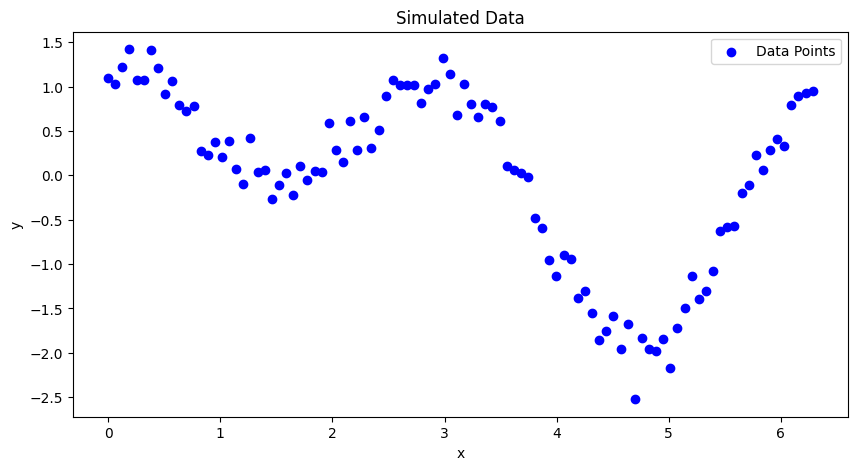

In [9]:
# Constants
X_RANGE = np.linspace(0, 2 * np.pi, 100)  # Generate 100 points between 0 and 2π
NOISE_STD_DEV = 0.2  # Standard deviation of the Gaussian noise

# Simulate the function
np.random.seed(42)  # Seed for reproducibility
noise = np.random.normal(0, NOISE_STD_DEV, len(X_RANGE))  # Generate Gaussian noise
y_values = np.sin(X_RANGE) + np.cos(2 * X_RANGE) + noise  # Calculate y values including noise

# Plot the data
plt.figure(figsize=(10, 5))
plt.scatter(X_RANGE, y_values, color='blue', label='Data Points')  # Scatter plot of noisy data
plt.title('Simulated Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


gen	nevals
0  	300   
1  	176   
2  	130   
3  	117   
4  	147   
5  	157   
6  	144   
7  	156   
8  	165   
9  	148   
10 	148   
11 	158   
12 	160   
13 	174   
14 	164   
15 	154   
16 	145   
17 	161   
18 	146   
19 	147   
20 	143   
21 	145   
22 	159   
23 	152   
24 	156   
25 	157   
26 	146   
27 	132   
28 	146   
29 	145   
30 	149   
31 	151   
32 	179   
33 	148   
34 	151   
35 	165   
36 	181   
37 	154   
38 	165   
39 	155   
40 	173   
41 	140   
42 	162   
43 	137   
44 	147   
45 	142   
46 	173   
47 	159   
48 	159   
49 	159   
50 	155   
Best individual: cos(add(x, x)) (0.48439880539597924,)


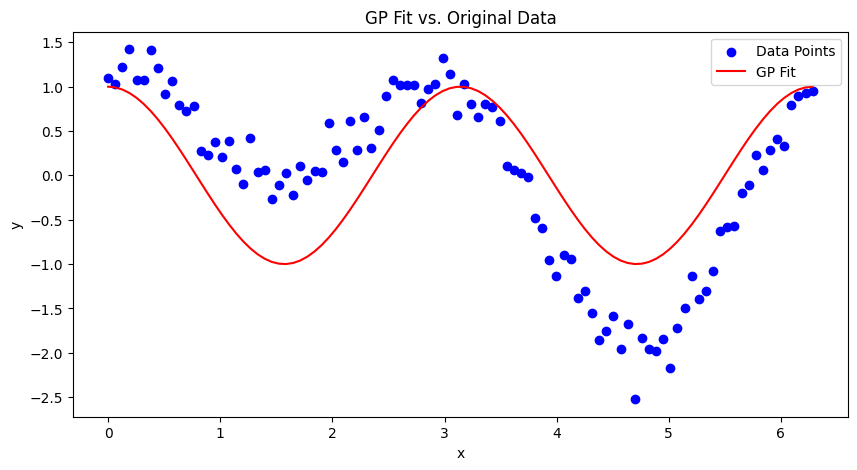

In [23]:
from deap import base, creator, tools, gp, algorithms
import operator
import warnings
warnings.filterwarnings("ignore")

# Helper function to prevent division by zero errors in GP trees
def protectedDiv(left, right):
    try:
        val = left / right
        return val
    except ZeroDivisionError:
        return 1  # Return a neutral value in case of zero division

# Setup the primitive set for the GP
pset = gp.PrimitiveSet("MAIN", 1)  # '1' indicates the number of input variables (x)
pset.addPrimitive(operator.add, 2)  # Addition operator
pset.addPrimitive(operator.sub, 2)  # Subtraction operator
pset.addPrimitive(operator.mul, 2)  # Multiplication operator
pset.addPrimitive(protectedDiv, 2)  # Our protected division operator
pset.addPrimitive(np.sin, 1)        # Sine function
pset.addPrimitive(np.cos, 1)        # Cosine function
pset.renameArguments(ARG0='x')      # Rename the argument for readability

# Define fitness and individual types
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Minimize the fitness function
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

# Configure the toolbox
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)  # Generate expressions
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

# Function to evaluate the mean squared error between true y values and GP predictions
def evalSymbReg(individual, points, y_true):
    func = toolbox.compile(expr=individual)  # Compile the GP expression to a callable function
    sqerrors = ((func(x) - y) ** 2 for x, y in zip(points, y_true))  # Calculate squared errors
    return (np.mean(list(sqerrors)),)  # Return the average squared error

toolbox.register("evaluate", evalSymbReg, points=X_RANGE, y_true=y_values)
toolbox.register("select", tools.selTournament, tournsize=5)  # Tournament selection
toolbox.register("mate", gp.cxOnePoint)  # One point crossover
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)  # Expression for mutation
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)  # Uniform mutation

# Running the GP
population = toolbox.population(n=300)  # Create a population of 300 individuals
hall_of_fame = tools.HallOfFame(1)  # Store the best individual

stats = tools.Statistics(lambda ind: ind.fitness.values)  # Gather statistics during evolution
stats.register("avg", np.mean)
stats.register("min", np.min)

# Run the genetic algorithm simple evolution
result, log = algorithms.eaSimple(population, toolbox, 0.5, 0.05, 50, halloffame=hall_of_fame)

# Print the best individual and its fitness
print('Best individual:', hall_of_fame[0], hall_of_fame[0].fitness)

# Plotting the result
best_func = toolbox.compile(expr=hall_of_fame[0])  # Compile the best individual
plt.figure(figsize=(10, 5))
plt.scatter(X_RANGE, y_values, color='blue', label='Data Points')  # Scatter plot of the original data
plt.plot(X_RANGE, [best_func(x) for x in X_RANGE], color='red', label='GP Fit')  # Plot GP approximation
plt.title('GP Fit vs. Original Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


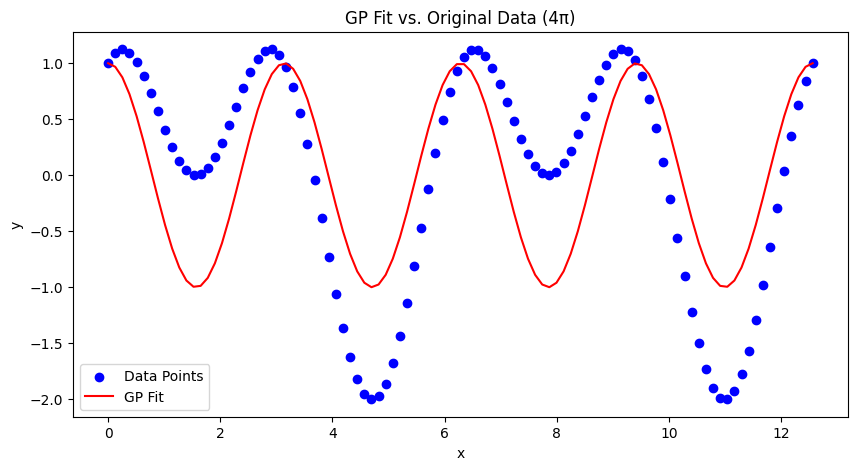

In [25]:
# plot the real data and the GP for 4pi
X_RANGE_4PI = np.linspace(0, 4 * np.pi, 100)  # Generate 100 points between 0 and 4π
y_values_4pi = np.sin(X_RANGE_4PI) + np.cos(2 * X_RANGE_4PI)  # Calculate y values without noise

plt.figure(figsize=(10, 5))
plt.scatter(X_RANGE_4PI, y_values_4pi, color='blue', label='Data Points')  # Scatter plot of the original data
plt.plot(X_RANGE_4PI, [best_func(x) for x in X_RANGE_4PI], color='red', label='GP Fit')  # Plot GP approximation
plt.title('GP Fit vs. Original Data (4π)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()